In [3]:
import tensorflow as tf
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# get_custom_objects().update({'my_custom_func': my_custom_func})
# Load the model
model = load_model("model.h5", compile = False)


In [5]:

# Function to preprocess input image and get enhanced image
def enhance_image(image_path):
    IMAGE_SIZE1 = 1080
    IMAGE_SIZE2 = 1350
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(image, [IMAGE_SIZE1, IMAGE_SIZE2])
    image = tf.cast(image, dtype=tf.float32) / 255.0
    image = tf.expand_dims(image, axis=0)  # Add batch dimension
    enhanced_image = model.predict(image)
    enhanced_image = np.squeeze(enhanced_image, axis=0)  # Remove batch dimension
    enhanced_image = np.clip(enhanced_image * 255.0, 0, 255).astype(np.uint8)
    return enhanced_image


In [13]:

# Example usage:
input_image_path = 'parth.jpeg'
enhanced_image = enhance_image(input_image_path)


1/1 [==============================] - 110s 110s/step


In [14]:

# Plot the original and enhanced images
original_image = plt.imread(input_image_path)


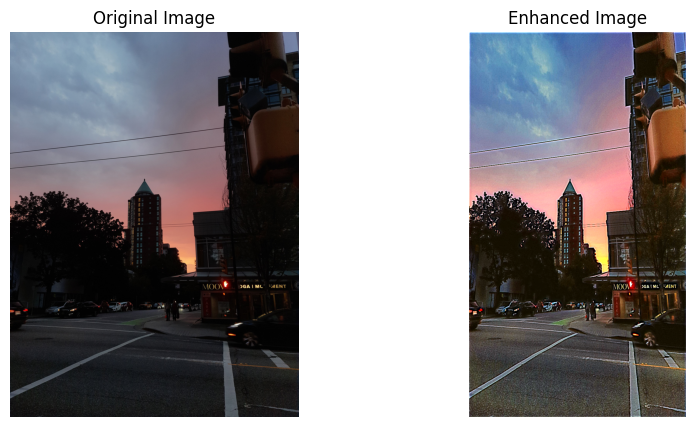

In [15]:

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(enhanced_image)
plt.title("Enhanced Image")
plt.axis("off")

plt.show()
